# F4 Statistics
Takes csv output as produced by R script admixAnalysis.r

In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl

In [6]:
yemenDis = set(('Hadramaut', 'Azal', 'Aden', 'Hudaydah', 'Sheba', 'Tahamh', 'Aljanad' ))
eastafrica = set(("Afar.WGA", "Jew_Ethiopian", "Ethiopia_4500BP_published.SG", "Datog", 'Somali'))
levant = set(("Lebanese", "Palestinian.SDG", "Druze.SDG", "Saudi", "Iranian_Bandari", 'BedouinB', 'BedouinB.SDG', 'BedouinA',))
regionColors = 'green', 'red', 'blue'
regionNames = 'Yemen', 'East Africa', 'Arabia/Levant'

In [ ]:
def forestPlot(f4, pop1, pop2, top=20, savefig=None, title=''):
    f4a = f4[(f4.pop1==pop1) & (f4.pop2==pop2) & (f4.pop1!=f4.pop3)].sort_values(by='est', ascending=False).head(top)
    f4a['rank'] = range(len(f4a))[::-1]
    maxZ = f4a.z.max()
    minZ = f4a.z.min()
    cmap = plt.get_cmap('rainbow')
    f4a['colors'] = [cmap((z-minZ)/(maxZ-minZ)) for z in f4a.z]
    f4a['col'] = 'gray'
    f4a['region'] = 'other'    

    for regCol, region, rname in zip(regionColors, [yemenDis, eastafrica, levant], regionNames):
        f4a.loc[f4a.pop3.isin(region), 'col'] = regCol
        f4a.loc[f4a.pop3.isin(region), 'region'] = rname

    ## plotting
    fig, ax = plt.subplots(ncols=1, figsize=(10, 6))
    encounter = set()
    for i,f4b in f4a.iterrows():    
    #    f4b = f4a[f4a.pop3.isin(region)]
        if not f4b.region in encounter:
            encounter.add(f4b.region)
            label = f4b.region
        else: label = ""
        ax.errorbar(f4b['est'], f4b['rank'], xerr=f4b['se'], fmt='d', mfc=f4b.colors, label=label, capsize=5, markersize=10, linestyle='', color=f4b['col'])
    ax.legend(prop={'size':13})
    ax.set_xlabel('F4')

    # colorbar
    norm = mpl.colors.Normalize(vmin=minZ, vmax=maxZ)
    colbar = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    fig.colorbar(colbar, ax=ax, orientation='vertical', label='Z-score', shrink=0.5)
    if title: fig.suptitle(title) 
    ax.set_yticks(f4a['rank'], f4a['pop3'])
    if savefig:
        fig.savefig(savefig)
        print(f'Saved {savefig}')
    

## Forest plots with Outgroup Mbuti
Forest plots for selected regions of Yemen (pop1) vs Lebanese (pop2), comprehensive donor search (X), and outgroup Mbuti


In [44]:
outgroup = 'Mbuti'

## load AdmixTools results
f4table = f'../AdmixTools_HO_mind0.01_geno_0.05/f4_yemenDis_levant_X_{outgroup}.csv'
f4 = pd.read_csv(f4table)
f4.pop1.value_counts()

Hadramaut    2425
Azal         2425
Aden         2425
Hudaydah     2425
Sheba        2425
Tahamh       2425
Name: pop1, dtype: int64

Saved sheba_Mbuti_f4.pdf


,Unnamed: 0,pop1,pop2,pop3,pop4,est,se,z,p
9755,9756,Sheba,Lebanese,BedouinB,Mbuti,0.001994,0.000202,9.876008,5.289847e-23
9706,9707,Sheba,Lebanese,Aden,Mbuti,0.001938,0.000197,9.855364,6.498084e-23
10114,10115,Sheba,Lebanese,Tahamh,Mbuti,0.001900,0.000193,9.857558,6.357687e-23
9858,9859,Sheba,Lebanese,Hadramaut,Mbuti,0.001853,0.000190,9.728453,2.280348e-22
9732,9733,Sheba,Lebanese,Azal,Mbuti,0.001815,0.000191,9.516757,1.786685e-21
9756,9757,Sheba,Lebanese,BedouinB.SDG,Mbuti,0.001783,0.000203,8.792226,1.466248e-18
9714,9715,Sheba,Lebanese,Aljanad,Mbuti,0.001752,0.000184,9.521131,1.713050e-21
9868,9869,Sheba,Lebanese,Hudaydah,Mbuti,0.001745,0.000180,9.718165,2.522878e-22
9913,9914,Sheba,Lebanese,Jew_Yemenite,Mbuti,0.001572,0.000198,7.930089,2.189896e-15
10083,10084,Sheba,Lebanese,Saudi,Mbuti,0.001537,0.000200,7.665927,1.775443e-14


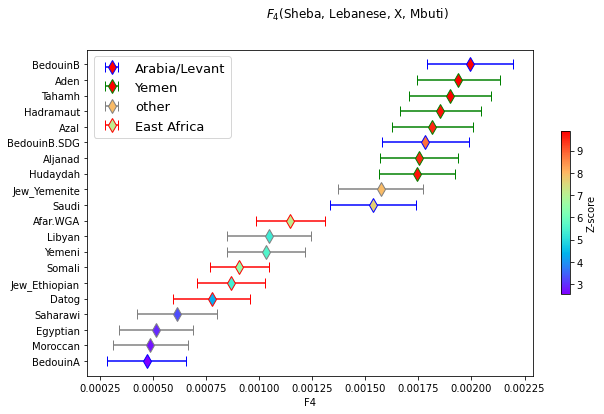

In [45]:
pop1 = 'Sheba'
forestPlot(f4, pop1, 'Lebanese', savefig=f'{pop1.lower()}_{outgroup}_f4.pdf', title=f'$F_4$({pop1}, Lebanese, X, {outgroup})')
f4[(f4.pop1==pop1) & (f4.pop2=='Lebanese') & (f4.pop1!=f4.pop3)].sort_values(by='est', ascending=False).head(10)

Saved aden_Mbuti_f4.pdf


,Unnamed: 0,pop1,pop2,pop3,pop4,est,se,z,p
4955,4956,Aden,Lebanese,Datog,Mbuti,0.000439,0.000178,2.462357,0.013803
5238,5239,Aden,Lebanese,Sheba,Mbuti,0.000387,0.000219,1.768822,0.076924
4859,4860,Aden,Lebanese,Afar.WGA,Mbuti,0.000300,0.000171,1.761819,0.078100
5246,5247,Aden,Lebanese,Somali,Mbuti,0.000266,0.000145,1.838143,0.066041
4864,4865,Aden,Lebanese,Aljanad,Mbuti,0.000169,0.000196,0.863254,0.387998
5095,5096,Aden,Lebanese,Kikuyu,Mbuti,0.000167,0.000147,1.139311,0.254573
5264,5265,Aden,Lebanese,Tahamh,Mbuti,0.000158,0.000202,0.783137,0.433547
5055,5056,Aden,Lebanese,Jew_Ethiopian,Mbuti,0.000109,0.000165,0.661038,0.508588
5018,5019,Aden,Lebanese,Hudaydah,Mbuti,0.000104,0.000190,0.544512,0.586089
4882,4883,Aden,Lebanese,Azal,Mbuti,0.000093,0.000204,0.456479,0.648046


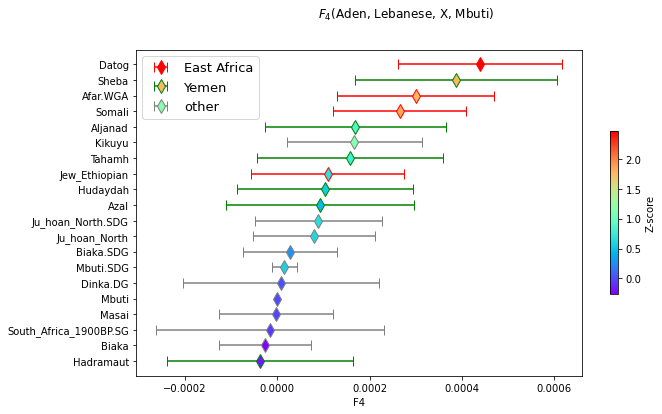

In [46]:
pop1 = 'Aden'
forestPlot(f4, pop1, 'Lebanese', savefig=f'{pop1.lower()}_{outgroup}_f4.pdf', title=f'$F_4$({pop1}, Lebanese, X, {outgroup})')
f4[(f4.pop1==pop1) & (f4.pop2=='Lebanese') & (f4.pop1!=f4.pop3)].sort_values(by='est', ascending=False).head(10)

Saved hudaydah_Mbuti_f4.pdf


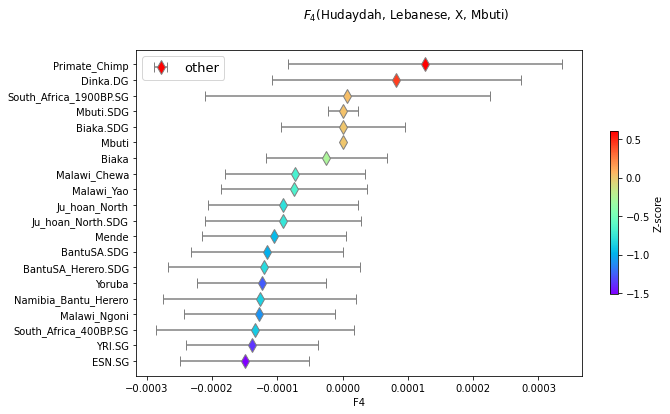

In [34]:
pop1 = 'Hudaydah'
forestPlot(f4, pop1, 'Lebanese', savefig=f'{pop1.lower()}_{outgroup}_f4.pdf', title=f'$F_4$({pop1}, Lebanese, X, {outgroup})')

Saved hadramaut_Mbuti_f4.pdf


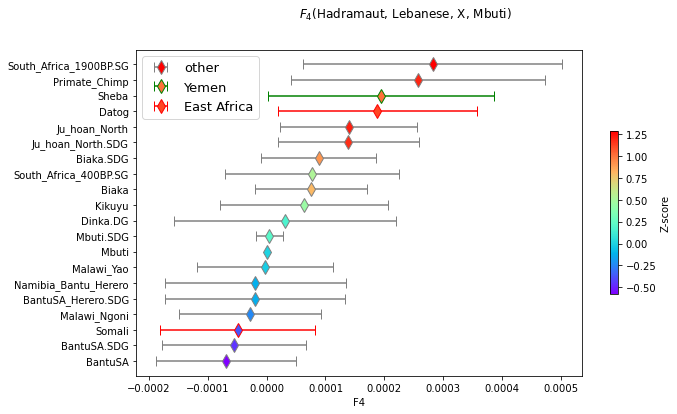

In [35]:
pop1 = 'Hadramaut'
forestPlot(f4, pop1, 'Lebanese', savefig=f'{pop1.lower()}_{outgroup}_f4.pdf', title=f'$F_4$({pop1}, Lebanese, X, {outgroup})')

## Forest plots with outgroup Chimp

In [47]:
f4table = '../AdmixTools_HO_mind0.01_geno_0.05/f4_yemenDis_levant_X_Chimp.csv'
f4 = pd.read_csv(f4table)
outgroup='Chimp'

Saved sheba_Chimp_f4.pdf


,Unnamed: 0,pop1,pop2,pop3,pop4,est,se,z,p
9755,9756,Sheba,Lebanese,BedouinB,Primate_Chimp,0.002205,0.000290,7.607214,2.800664e-14
9706,9707,Sheba,Lebanese,Aden,Primate_Chimp,0.002149,0.000291,7.397100,1.391911e-13
10114,10115,Sheba,Lebanese,Tahamh,Primate_Chimp,0.002111,0.000283,7.467738,8.158516e-14
9858,9859,Sheba,Lebanese,Hadramaut,Primate_Chimp,0.002064,0.000282,7.311284,2.646021e-13
9732,9733,Sheba,Lebanese,Azal,Primate_Chimp,0.002026,0.000284,7.133486,9.785852e-13
9756,9757,Sheba,Lebanese,BedouinB.SDG,Primate_Chimp,0.001994,0.000291,6.842823,7.764742e-12
9714,9715,Sheba,Lebanese,Aljanad,Primate_Chimp,0.001963,0.000278,7.073609,1.509547e-12
9868,9869,Sheba,Lebanese,Hudaydah,Primate_Chimp,0.001956,0.000275,7.122313,1.061310e-12
9913,9914,Sheba,Lebanese,Jew_Yemenite,Primate_Chimp,0.001783,0.000291,6.120279,9.341175e-10
10083,10084,Sheba,Lebanese,Saudi,Primate_Chimp,0.001748,0.000287,6.082560,1.182786e-09


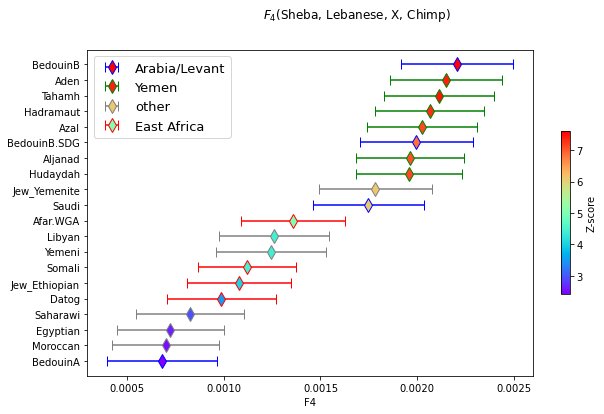

In [48]:
pop1 = 'Sheba'
forestPlot(f4, pop1, 'Lebanese', savefig=f'{pop1.lower()}_{outgroup}_f4.pdf', title=f'$F_4$({pop1}, Lebanese, X, {outgroup})')
f4[(f4.pop1==pop1) & (f4.pop2=='Lebanese') & (f4.pop1!=f4.pop3)].sort_values(by='est', ascending=False).head(10)

Saved aden_Chimp_f4.pdf


,Unnamed: 0,pop1,pop2,pop3,pop4,est,se,z,p
4955,4956,Aden,Lebanese,Datog,Primate_Chimp,0.000573,0.000283,2.024006,0.042970
5238,5239,Aden,Lebanese,Sheba,Primate_Chimp,0.000521,0.000309,1.686272,0.091743
4859,4860,Aden,Lebanese,Afar.WGA,Primate_Chimp,0.000434,0.000269,1.613080,0.106727
5246,5247,Aden,Lebanese,Somali,Primate_Chimp,0.000399,0.000260,1.536216,0.124485
4864,4865,Aden,Lebanese,Aljanad,Primate_Chimp,0.000303,0.000293,1.032089,0.302030
5095,5096,Aden,Lebanese,Kikuyu,Primate_Chimp,0.000301,0.000260,1.158964,0.246471
5264,5265,Aden,Lebanese,Tahamh,Primate_Chimp,0.000291,0.000296,0.984477,0.324881
5055,5056,Aden,Lebanese,Jew_Ethiopian,Primate_Chimp,0.000243,0.000275,0.884377,0.376493
5018,5019,Aden,Lebanese,Hudaydah,Primate_Chimp,0.000237,0.000287,0.826503,0.408519
4882,4883,Aden,Lebanese,Azal,Primate_Chimp,0.000227,0.000297,0.763701,0.445045


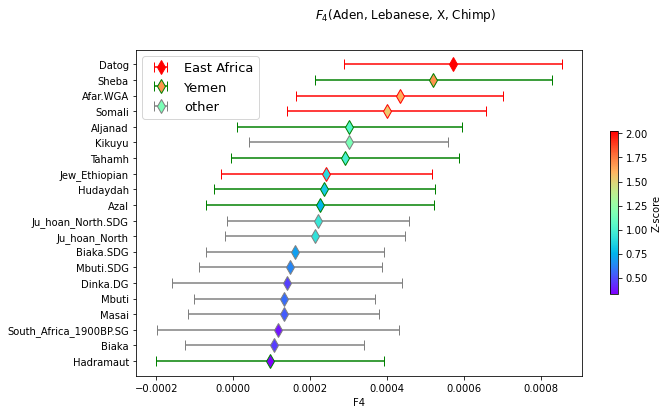

In [49]:
pop1 = 'Aden'
forestPlot(f4, pop1, 'Lebanese', savefig=f'{pop1.lower()}_{outgroup}_f4.pdf', title=f'$F_4$({pop1}, Lebanese, X, {outgroup})')
f4[(f4.pop1==pop1) & (f4.pop2=='Lebanese') & (f4.pop1!=f4.pop3)].sort_values(by='est', ascending=False).head(10)

Saved hudaydah_Chimp_f4.pdf


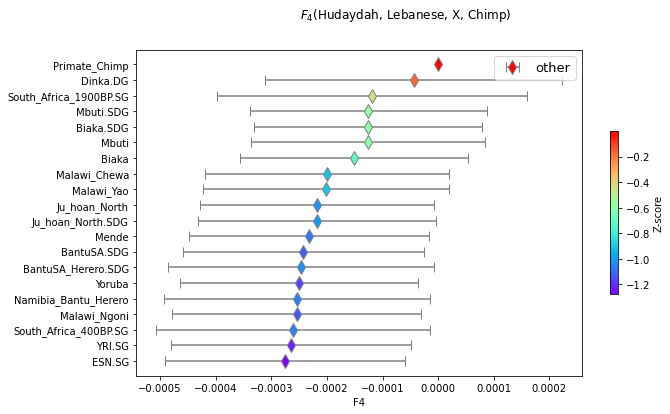

In [41]:
pop1 = 'Hudaydah'
forestPlot(f4, pop1, 'Lebanese', savefig=f'{pop1.lower()}_{outgroup}_f4.pdf', title=f'$F_4$({pop1}, Lebanese, X, {outgroup})')

Saved hadramaut_Chimp_f4.pdf


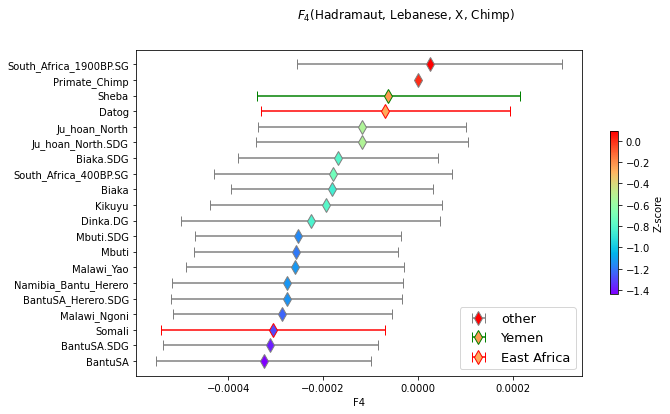

In [42]:
pop1 = 'Hadramaut'
forestPlot(f4, pop1, 'Lebanese', savefig=f'{pop1.lower()}_{outgroup}_f4.pdf', title=f'$F_4$({pop1}, Lebanese, X, {outgroup})')

In [109]:
f4[f4.pop1=='Tahamh']

,Unnamed: 0,pop1,pop2,pop3,pop4,est,se,z,p
12539,12540,Tahamh,Lebanese,Tahamh,Mbuti,0.007933,0.000209,37.952404,0.000000e+00
12616,12617,Tahamh,Palestinian.SDG,Aden,Mbuti,0.000223,0.000172,1.297257,1.945428e-01
12619,12620,Tahamh,Palestinian.SDG,Afar.WGA,Mbuti,0.000255,0.000137,1.855702,6.349606e-02
12778,12779,Tahamh,Palestinian.SDG,Hudaydah,Mbuti,0.000174,0.000160,1.087887,2.766450e-01
12815,12816,Tahamh,Palestinian.SDG,Jew_Ethiopian,Mbuti,0.000191,0.000133,1.436028,1.509944e-01
...,...,...,...,...,...,...,...,...,...
14505,14506,Tahamh,Iranian_Bandari,Tunisian,Mbuti,0.001039,0.000211,4.920715,8.622872e-07
14506,14507,Tahamh,Iranian_Bandari,Turkey_N.DG,Mbuti,0.001407,0.000331,4.257936,2.063227e-05
14507,14508,Tahamh,Iranian_Bandari,Turkey_N.SG,Mbuti,0.001487,0.000306,4.860617,1.170204e-06
14512,14513,Tahamh,Iranian_Bandari,Tuscan_2.SDG,Mbuti,0.000392,0.000280,1.401057,1.611972e-01
